# Построение графиков

Matplotlib — одна из старейших научных библиотек визуализации и построения графиков, доступных на Python. С помощью Matplotlib можно создать практически любую двумерную визуализацию. В обширной [галерее примеров](https://matplotlib.org/gallery/index.html) показано множество изображений, которые можно создать с помощью Matplotlib.

График Matplotlib содержит

  * Один или несколько объектов `Axes`, каждый из которых является отдельным подрисунком.

  * Объект `Figure`, который представляет собой итоговое изображение, содержащее один или несколько `Axes`.
 

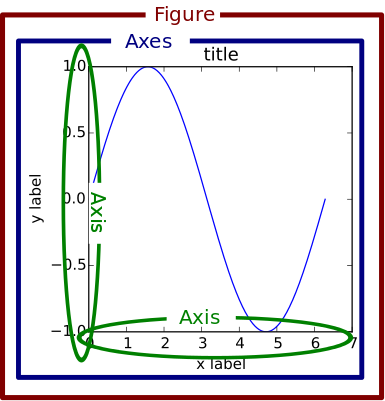

Картинка из [Matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html) чтобы понять (или хотя бы посмотреть), из чего состоит рисунок в matplotlib и какие его части можно кастомизировать.

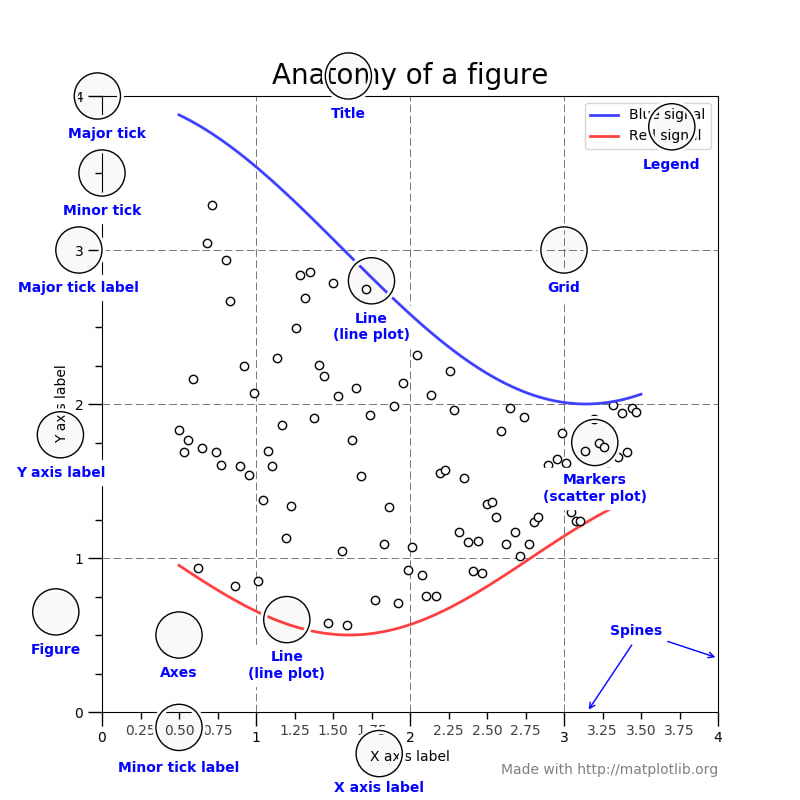

## Примеры

Перед решением заданий давайте разберем несколько примеров.

In [116]:
# импорт библиотек matplotlib, numpy, pandas (понадобится для считывания данных)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Простой график

Самым простым способом является интерактивный режим работы с графиком, в котором мы просим вызываем функции библиотеки для того, чтобы совершить какие-либо действия. В дальнейшем будет приведен пример работы с графиком как с объектом, что является более правильной методикой, когда нужно строить сложные графики в большом количестве.

**Обратите внимание**, что если вы работаете не в Jupyter Notebook, после выполнения функции `plt.show()` у вас появится новое окно с графиком. Если в запущенном файле вы пытались построить несколько графиков на разных `Figure`, то для отображения следующего графика вам надо закрыть предыдущий.  

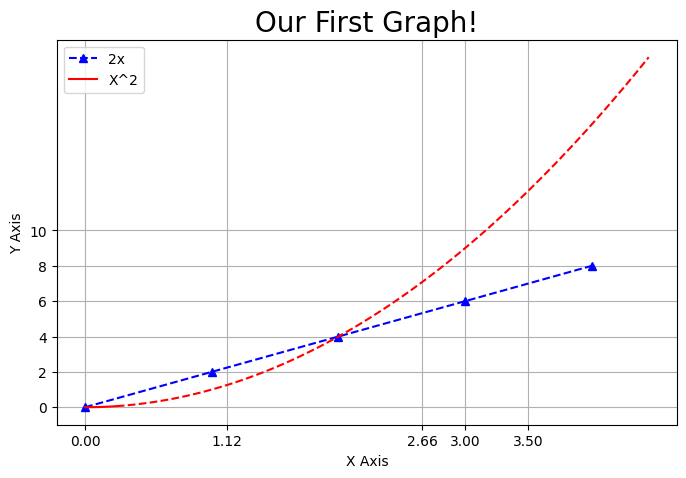

In [113]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Инициализировать рисунок/Figure
# dpi -- количество пикселей на дюйм в рисунке
# figsize -- пропорции "поля" рисунка
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Основные возможные аргументы функции plot. По умолчанию необходимы только x и y
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

#нарисуем график первой функции -- 2x
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# С помощью numpy мы можем создавать массив из чисел с определенным интервалом функцией arange. np.linspace(..) делает то же самое, но с целыми числами
x2 = np.arange(0,4.5,0.05)

# Нарисуем часть второго графика как сплошную кривую -- квадрат значений x2
# Поскольку x2 -- массив numpy, мы можем это сделать просто "возведя в квадрат" массив
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Нарисуем часть графика пунктиром. 'r' после x и y означает красный цвет, '--' - рисовку пунктиром 
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Добавим заголовок (в fontdict нужен словарь, шрифт должен поддерживаться matplotlib'ом)
plt.title('Our First Graph!', fontdict={'fontname': 'sans-serif', 'fontsize': 20})

# Подпишем оси
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Зададим какие-нибудь корявые "штрихи"/ticks на осях. в эти фунции можно передать любой список
plt.xticks([0,1.12,2.66,3,3.5])
plt.yticks([0,2,4,6,8,10])

# сделаем по этим штрихам сетку
plt.grid()

# функция легенды графика для отображения label'ов графиков
plt.legend()

# Можем сохранить график в высоком качестве
plt.savefig('mygraph.png', dpi=300)

# И вызвать эту функцию чтобы график сразу после отрисовки не пропал, пока мы его не закроем
plt.show()

### Столбчатая диаграмма (bar chart)

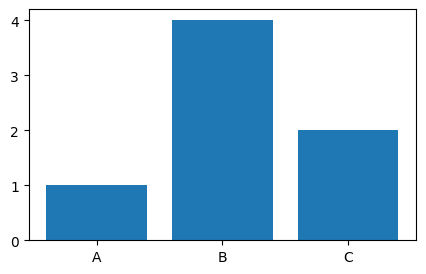

In [9]:
# принцип настройки схожий, но вместо plt.plot используем plt.bar
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

plt.savefig('barchart.png', dpi=300)

plt.show()

### Гистограмма

2500


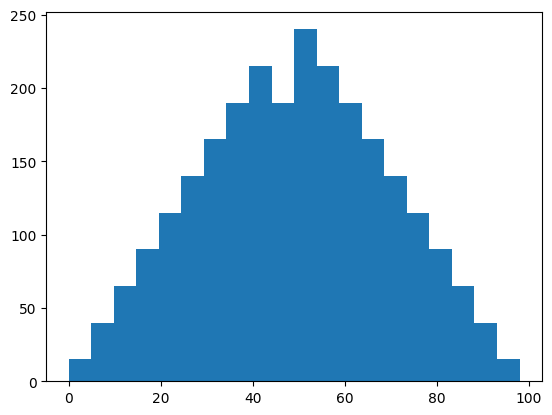

In [112]:
# создадим два списка чисел от 0 до 49 и составим список S попарных сумм элементов двух списков
# посмотрим распределение получившихся чисел построив гистограмму

x = [i for i in range(50)]
y = [j for j in range(50)]
S = [i + j for i in x for j in y]
print(len(S))
#bins задает количество столбцов гистограммы. если не задать, подберутся автоматически
plt.hist(S, bins = 20)

plt.show()
# получился треугольник с центром около 50 
# сложить два равномерных распределения -- самый простой способ получить треугольное распределение

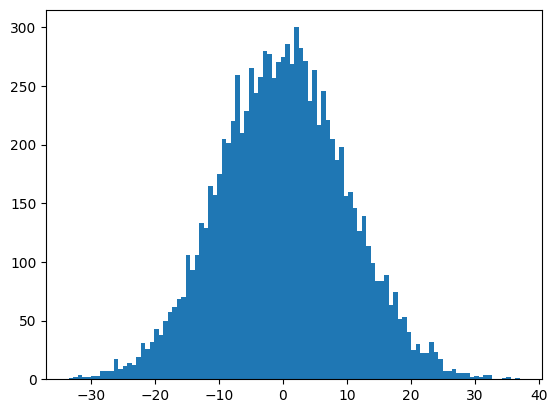

In [120]:
# попробуем сгенерировать случайные числа из нормального распределения и посмотреть, как оно выглядит

# среднее
pos = 0
 
# параметр отвечающий за разброс
scale = 10
 
# размер массива случайных чисел (сколько их сгенерируем)
size = 10000
 
# используем функцию из подраздела random библиотеки numpy и передадим наши параметры
values = np.random.normal(pos, 10, size)
 
# строим гистограмму с 100 блоков
plt.hist(values, 100)

plt.show()

### Круговая диаграмма (pie chart)

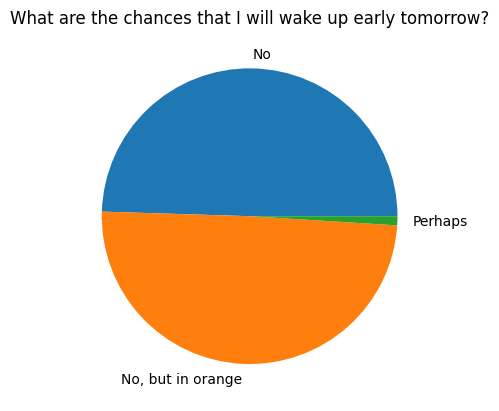

In [34]:
plt.pie([0.5, 0.5, 0.01], labels = ['No','No, but in orange','Perhaps'])

plt.title('What are the chances that I will wake up early tomorrow?')

plt.show()

### Несколько графиков

В случае, если нам необходимо построить несколько графиков, таким простым подходом не ограничишься. В этом случае будет правильнее создавать отдельные **объекты** типов `Figure` и `Axes` и настраивать их посредством **методов** этих объектов. 

C:\Users\Klimkou\AppData\Local\Temp\ipykernel_12632\1725427724.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


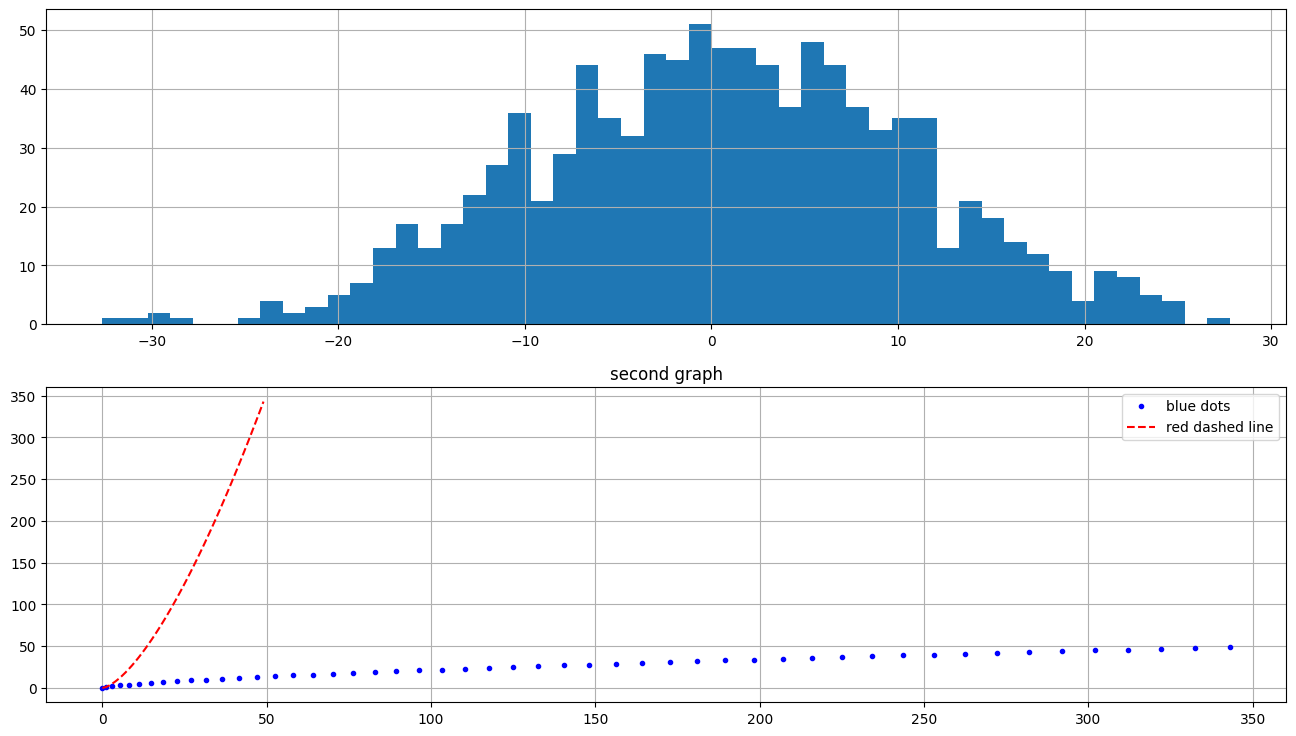

In [73]:
fig = plt.figure(figsize = (16,9)) # создали рисунок/Figure Fig пропорциями 16:9
ax1 = fig.add_subplot(211) # создали Axes (подграфик) ax1 в серии из 2 графиков, поставили на позицию [1,1] -- левый верхний угол
ax2 = fig.add_subplot(212) # создали Axes ax2 в серии из 2 графиков, поставили на позицию [1,2] -- первый график во второй "строке" графиков

# сгенерируем данные для какой-нибудь гистограммы
values = np.random.normal(0, 10, 1000)
 
# строим гистограмму с 50 блоками
ax1.hist(values, 50)
ax1.grid() # делаем сетку на графике ax1

x = [i for i in range(50)]
y = [j**1.5 for j in x]


ax2.plot(y,x,'b.', label = 'blue dots')
ax2.plot(x,y,'r--', label = 'red dashed line')
ax2.set_title('second graph') #здесь название функции немного отличается от случая, когда мы вызывали напрямую из plt!


ax2.grid() # делаем сетку на графике ax2
ax2.legend() # делаем легенду на графике ax2

plt.show()

В реальности данные, которые мы измеряем или получаем, не всегда ложатся в ровную закономерность, поэтому помимо линии аппроксимации (например прямой, полученной из МНК), имеет смысл также дорисовывать изначальные измеренные точки. С крестами погрешностей. Давайте это сделаем, чтобы было совсем красиво.

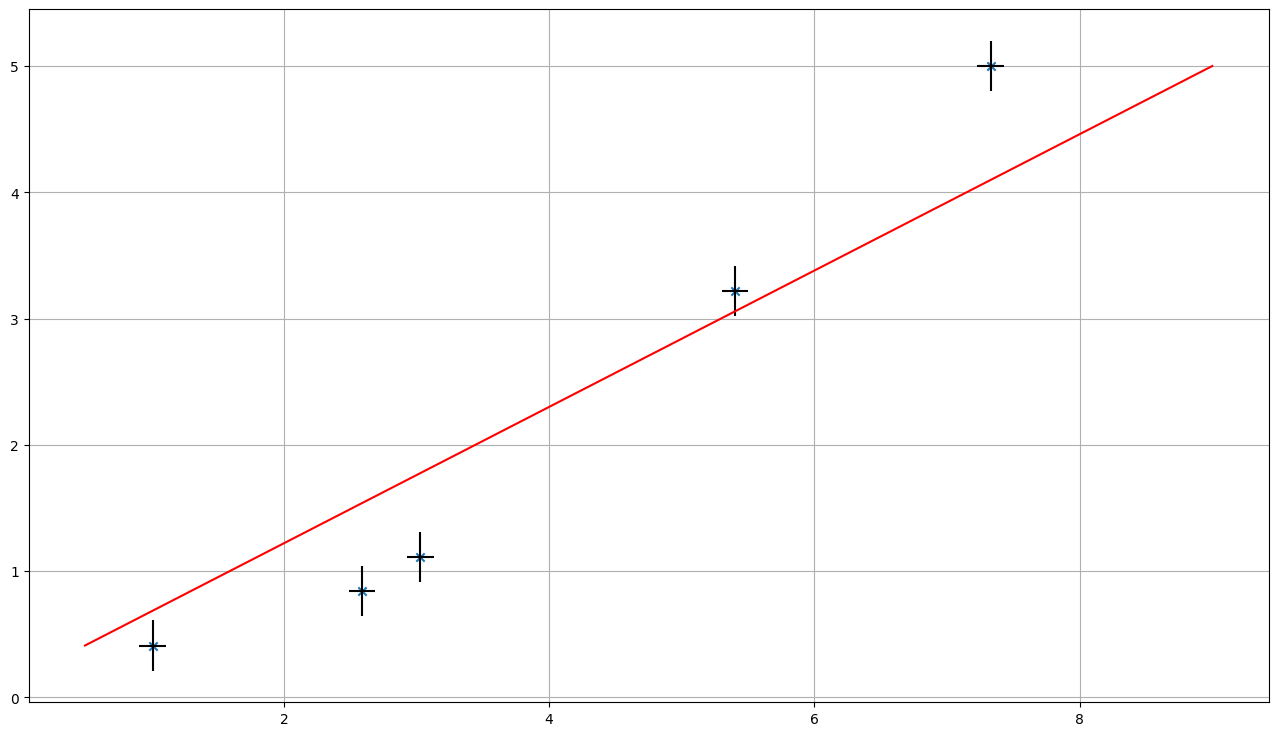

In [108]:
fig = plt.figure(figsize = (16,9)) # создали рисунок/Figure Fig пропорциями 16:9
ax1 = fig.add_subplot(111) # допустим, больше 1 графика нам не надо

x_measured = [1.01, 2.59, 3.03, 5.40, 7.33]
y_measured = [0.41, 0.84, 1.11, 3.22, 5.00]

#используем встроенный линейный интерполятор чтобы посчитать значения прямой МНК в точках, на которых будем строить нашу прямую
#Поскольку мы хотим прямую, нам достаточно двух точек -- начало и конец прямой
x = [0.5, 9.0]
y = np.interp(x, x_measured, y_measured)

# ставим точки функцией scatter, точки будем ставить крестиком
ax1.scatter(x_measured, y_measured, marker='x')

# поставим кресты погрешностей, linestyle = None, чтобы кресты не соединялись прямыми
ax1.errorbar(x_measured, y_measured, yerr=0.2, xerr = 0.1, color = 'k', linestyle = 'None')

#построим красную прямую МНК
ax1.plot(x,y, 'r')

ax1.grid() # делаем сетку

plt.show()
# для готового графика для лабы по общефизу не хватает только названия, подписанных осей и легенды, но это вы уже умеете
# успехов!

В папке Seminars лежат файлы iris_data.csv и BTC_data.csv. **CSV** -- comma-separated-values -- значения, разделенные запятой -- формат файла, в котором хранится серия значений, каждое на новой строке, где каждая строка содержит некоторое количество величин, разделенных запятой. Формат CSV поддерживается Excel, можете посмотреть их содержимое. Эти файлы понадобятся для выполнения заданий 3-6, скачайте их себе в директорию, где располагаются ваши .py файлы. Для чтения CSV файлов вам может пригодиться функция `read_csv` библиотеки `pandas`, однако считывать данные из CSV можно и без нее при помощи обычных `readlines` и `split`. 

### Упражнение 1 (Эксперименты)

Составьте произвольный набор данных. Постройте на них график, подходящий для отчета по общей физике. 

### Упражнение 2 (Стремление к нормальности)

Постройте на одном рисунке (но разных подграфиках) несколько гистограмм, которые покажут, что с увеличением количества точек полученных из распределения, гистограмма значений этих точек стремится к этому распределению. 

### Упражнение 3 (Пироги с цветами)
Постройте из файла iris_data -- стандартного датасета цветков ириса -- две круговые диаграммы: доля видов (Species) ирисов в датасете, Доли ирисов, у которых длина лепестка (PetalLengthCm) больше 1.2см, больше 1.2см и меньше 1.5см, больше 1.5см.

### Упражнение 4 (Подгониан)
Постройте из файла iris_data все возможные комбинации длин и ширин лепестков и чашелистников (Petal и Sepal). Можно ли заметить какие-либо закономерности? Если да, попробуйте построить прямую МНК и вывести на экран ее коэффициенты. 

### Упражнение 5 (Ты родился слишком поздно, чтобы ...)
В файле BTC_data лежат ежедневные значения цены биткоина на бирже с 2018 по 2023 год. Не будем вдаваться в подробности, чем отличаются четыре указанные цены, нас интересует только последнее число в каждой строке -- цена закрытия (close) и дата, первое значение в каждой строке. Постройте исторический график зависимости цены биткоина от времени. В качестве зарубок по оси X используйте даты в формате DD-MM-YY (например 06-03-2005 -- означает 6 марта 2005 года).

### Упражнение 6 (Мечта финансиста)
Кроме функции `interp` в `numpy` также есть функция `polyfit`. Попробуйте аппроксимировать цену биткоина каким-нибудь полиномом и постройте его на том же графике, что график цены.

In [136]:
df = pd.read_csv('iris_data.csv')
A = list(df['Species'])

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',


In [132]:
list(df['close'])

[19100,
 18200,
 17040,
 15330,
 14135,
 15785,
 14690,
 13745,
 14470,
 14855,
 14975,
 14900,
 16590,
 14905,
 14750,
 14450,
 13385,
 13945,
 11160,
 10945,
 11815,
 11360,
 10355,
 11095,
 11155,
 11200,
 10965,
 11170,
 9940,
 10000,
 9090,
 8585,
 7260,
 7550,
 8245,
 8325,
 8610,
 8860,
 8700,
 9290,
 10090,
 10020,
 11735,
 10370,
 10095,
 9950,
 10250,
 10660,
 10645,
 11065,
 11060,
 11615,
 10650,
 9790,
 9400,
 9015,
 8910,
 9070,
 8275,
 8235,
 8555,
 8400,
 8945,
 8890,
 8630,
 8615,
 7910,
 7915,
 7900,
 7335,
 6990,
 7460,
 6860,
 6760,
 6630,
 6675,
 6840,
 6920,
 7680,
 8105,
 7980,
 7885,
 8125,
 8260,
 8540,
 8845,
 9455,
 9000,
 8895,
 9080,
 9365,
 8985,
 9150,
 9675,
 9670,
 9435,
 9235,
 9280,
 9090,
 8625,
 8755,
 8555,
 8250,
 8180,
 8230,
 8375,
 8180,
 7600,
 7600,
 7440,
 7495,
 7320,
 7545,
 7440,
 7500,
 7625,
 7540,
 7705,
 7655,
 6750,
 6500,
 6270,
 6635,
 6530,
 6695,
 6735,
 6745,
 6710,
 6165,
 6245,
 6160,
 6135,
 6065,
 5865,
 6625,
 6580,
 6505,


In [111]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3) # аппроксимировать функцию y(x) полиномом третьей степени
print(z)
# чтобы не приходилось каждый раз строить полином с полученными коэффициентами, также существует функция poly1d
p = np.poly1d(z)
# теперь чтобы получить значение полинома с коэффициентами z в точке, например, 5, нам надо вызвать p(5) 
print(p(5))

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]
-1.0317460317460356


## *Подробные туториалы по numpy и matplotlib

В папке Seminars можно найти ноутбуки Numpy и Matplotlib. В них можно найти много полезных примеров по базовым операциям в этих библиотеках. Пока без перевода.

# Множества и словари

Множество в языке Python -- это структура данных, эквивалентная
множествам в математике. Элементы могут быть различных типов. Порядок
элементов не определён.

Действия, которые можно выполнять с множеством:

1.  добавлять и удалять элементы,
2.  проверять принадлежность элемента множеству,
3.  перебирать его элементы,
4.  выполнять операции над множествами (объединение, пересечение,
    разность).

Операция "проверить принадлежность элемента" выполняется в множестве
**намного** быстрее, чем в списке.

Элементами множества может быть любой **неизменяемый** тип данных: числа,
строки, кортежи.

Изменяемые типы данных не могут быть элементами множества, в частности,
нельзя сделать элементом множества список (вместо этого используйте
**неизменяемый** кортеж) или другое множество. Требование неизменяемости
элементов множества накладывается особенностями представления множества
в памяти компьютера.

### Задание множеств

Множество задается перечислением в фигурных скобках. Например:

``` python
A = {1, 2, 3}
```

Исключением явлеется пустое множество:

``` python
A = set()       # A -- множество
D = {}          # D -- не пустое множество, а пустой словарь!
```

Если функции set передать в качестве параметра список, строку или
кортеж, то она вернет множество, составленное из элементов списка,
строки, кортежа. Например:

``` python
>>> A = set('qwerty')
>>> print(A)
{'e', 'q', 'r', 't', 'w', 'y'}.
```

Каждый элемент может входить в множество только один раз.

``` python
>>> A = {1, 2, 3}
>>> B = {3, 2, 3, 1}
>>> print(A == B) # A и B — равные множества.
True
>>> set('Hello')
{'H', 'e', 'l', 'o'}
```

### Работа с элементами множеств

  `x in A`         принадлежит ли элемент `x` множеству `A` (возвращают
                   значение типа `bool`)

  `x not in A`     то же, что `not x in A`

  `A.add(x)`       добавить элемент `x` в множество `A`

  `A.discard(x)`   удалить элемент `x` из множества `A`

  `A.remove(x)`    удалить элемент `x` из множества `A`

  `A.pop()`        удаляет из множества один случайный элемент и возвращает
                   его

Поведение `discard` и `remove` различается тогда, когда удаляемый
элемент *отсутствует* в множестве: `discard` не делает ничего, а метод
remove генерирует исключение `KeyError`. Метод `pop` также генерирует
исключение `KeyError`, если множество пусто.

При помощи цикла for можно перебрать все элементы множества:

``` python
Primes = {2, 3, 5, 7, 11}
for num im Primes:
    print(num)
```

Из множества можно сделать список при помощи функции \`list\`:

``` python
>>> A = {1, 2, 3, 4, 5}
>>> B = list(A)
[1, 2, 3, 4, 5]
```

### Операции с множествами, обычные для математики

 `A | B`      Возвращает множество, являющееся объединением множеств A и B.
 `A.union(B)` 



 `A | = B` Записывает в A объединение множеств A и B. 
`A.update(B)`



`A & B` Возвращает множество, являющееся пересечением множеств A и B.
`A.intersection(B)`                              



`A &= B`     Записывает в A пересечение множеств A и B.
 `A.intersection_update(B)`



`A - B` Возвращает разность множеств A и B (элементы, входящие в A, но не входящие в B).
`A.difference(B)`



`A -= B` Записывает в A разность множеств A и B.
`A.difference_update(B)`



 `A ^ B` Возвращает симметрическую разность множеств A и B  (элементы, входящие в A или в B, но не в оба из них одновременно).
`A.symmetric_difference(B)` 



`A ^= B` Записывает в A симметрическую разность множеств
`A.symmetric_difference_update(B)`



`A <= B`  Возвращает true, если A является подмножеством B.
`A.issubset(B)`



`A >= B` Возвращает true, если B является подмножеством A.
`A.issuperset(B)`


## Словарь (ассоциативный массив)

В массиве или в списке индекс - это целое число. Традиционной является
следующая ситуация:

``` python
>>> Days = ['Sunday', 'Monday', 'Tuesday', 'Wednessday', 'Thursday', 'Friday', 'Saturday']
>>> Days[0]
'Sunday'
>>> Days[1]
'Monday'
```

А как реализовать обратное соответствие?

``` python
>>> Days['Sunday']
0
>>> Days['Monday']
1
```

При помощи списка или массива это сделать невозможно, нужно использовать
**ассоциативный массив** или **словарь**.

В словаре индекс может быть **любого неизменяемого типа**! Индексы, как и
сами хранимые значения, задаются явно:

``` python
Days = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednessday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}
>>> Days['Sunday']
0
>>> Days['Monday']
1
>>> Days['Yesterday']
Traceback (most recent call last):
File "<stdin>", line 1, in <module>
KeyError: 'Yesterday'
```

При попытке обратиться к несуществующему элементу ассоциативного массива
мы получаем исключение `KeyError`.

Особенностью ассоциативного массива является его динамичность: в него
можно добавлять новые элементы с произвольными ключами и удалять уже
существующие элементы.

``` python
>>> Days['Yesterday'] = -1
>>> print(Days['Yesterday'])
-1
```

При этом размер используемой памяти пропорционален размеру
ассоциативного массива. Доступ к элементам ассоциативного массива
выполняется хоть и медленнее, чем к обычным массивам, но в целом
довольно быстро.

Значения ключей `уникальны`, двух одинаковых ключей в словаре быть не
может. А вот значения могут быть одинаковыми.

``` python
>>> Days['Tomorrow'] = -1
>>> Days['Yesterday'] == Days['Tomorrow']
True
```

Ключом может быть произвольный *неизменяемый* тип данных: целые и
действительные числа, строки, кортежи. Ключом в словаре не может быть
множество, но может быть элемент типа frozenset: специальный тип данных,
являющийся аналогом типа set, который нельзя изменять после создания.
Значением элемента словаря может быть *любой* тип данных, в том числе и
изменяемый.

### Создание словаря

Пустой словарь можно создать при помощи функции `dict()` или пустой пары
фигурных скобок `{}` (вот почему фигурные скобки нельзя использовать для
создания пустого множества).

Для создания словаря с некоторым набором начальных значений можно
использовать следующие конструкции:

``` python
Capitals = {'Russia': 'Moscow', 'Ukraine': 'Kiev', 'USA': 'Washington'}
Capitals = dict(Russia = 'Moscow', Ukraine = 'Kiev', USA = 'Washington')
Capitals = dict([("Russia", "Moscow"), ("Ukraine", "Kiev"), ("USA", "Washington")])
Capitals = dict(zip(["Russia", "Ukraine", "USA"], ["Moscow", "Kiev", "Washington"]))
```

Также можно использовать генерацию словаря через Dict comprehensions:

``` python
Cities = ["Moscow", "Kiev", "Washington"]
States = ["Russia", "Ukraine", "USA"]
CapitalsOfState = {state: city for city, state in zip(Cities, States)}
```

Это особенно полезно, когда нужно \"вывернуть\" словарь наизнанку:

``` python
StateByCapital = {CapitalsOfState[state]: state for state in CapitalsOfState}
```

### Операции с элементами словарей

`value = A[key]` Получение элемента по ключу. Если элемента с заданным ключом в словаре нет, то возникает исключение `KeyError`.



 `value = A.get(key)` Получение элемента по ключу. Если элемента в словаре нет, то `get` возвращает `None`.           |



`key in A` Проверить принадлежность *ключа* словарю. 



`key not in A` То же, что not key in A.


`A[key] = value`  Добавление нового элемента в словарь.


`del A[key]` Удаление пары ключ-значение с ключом key. Возбуждает исключение KeyError, если такого ключа нет. 




`value = A.pop(key)`  Удаление пары ключ-значение с ключом `key` и возврат значения удаляемого элемента. Если такого ключа нет, то возбуждается `KeyError`. 



`len(A)` Возвращает количество пар *ключ-значение*, хранящихся в словаре. 

### Перебор элементов словаря по ключу

``` python
for key in A:
    print(key, A[key])
```

### Представления элементов словаря

Представления во многом похожи на списки, но они остаются связанными со
своим исходным словарём и изменяются, если менять значения элементов
словаря.

-   Метод `keys` возвращает представление ключей всех элементов.
-   Метод `values` возвращает представление всех значений.
-   Метод `items` возвращает представление всех пар (кортежей) из ключей
    и значений.

``` python
>>> A = dict(a='a', b='b', c='c')
>>> k = A.keys()
>>> v = A.values()
>>> k, v
(dict_keys(['c', 'b', 'a']), dict_values(['c', 'b', 'a']))
>>> A['d'] = 'a'
>>> k, v
(dict_keys(['d', 'c', 'b', 'a']), dict_values(['a', 'c', 'b', 'a']))
```

Учтите что итерироваться по представлениям изменяя словарь нельзя

``` python
>>> for key in A.keys():
...     del A[key]
...
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
RuntimeError: dictionary changed size during iteration
```

Можно, если в начале скопировать представление в список

``` python
>>> for key in list(A.keys()):
...     del A[key]
...
>>> A
{}
```

### Пример использования словаря

``` python
# Создадим пустой словать Capitals
Capitals = dict()

# Заполним его несколькими значениями
Capitals['Russia'] = 'Moscow'
Capitals['Ukraine'] = 'Kiev'
Capitals['USA'] = 'Washington'

# Считаем название страны
print('В какой стране вы живете?')
country = input()

# Проверим, есть ли такая страна в словаре Capitals
if country in Capitals:
    # Если есть - выведем ее столицу
    print('Столица вашей страны', Capitals[country])
else:
    # Запросим название столицы и добавим его в словарь
    print('Как называется столица вашей страны?')
    city = input()
    Capitals[country] = city
```

### Когда нужно использовать словари

Словари нужно использовать в следующих случаях:

-   Подсчет числа каких-то объектов. В этом случае нужно завести
    словарь, в котором ключами являются объекты, а значениями --- их
    количество.
-   Хранение каких-либо данных, связанных с объектом. Ключи --- объекты,
    значения --- связанные с ними данные. Например, если нужно по
    названию месяца определить его порядковый номер, то это можно
    сделать при помощи словаря
    `Num['January'] = 1; Num['February'] = 2; ...`
-   Установка соответствия между объектами (например,
    "родитель---потомок"). Ключ --- объект, значение --- соответствующий
    ему объект.
-   Если нужен обычный массив, но при этом масимальное значение индекса
    элемента очень велико, но при этом будут использоваться не все
    возможные индексы (так называемый "разреженный массив"), то можно
    использовать ассоциативный массив для экономии памяти.

## Практическая работа по использованию словарей

### Упражнение №7 (Буквоед)

Дан текст на некотором языке. Требуется подсчитать сколько раз каждое
слово входит в этот текст и вывести десять самых часто употребяемых слов
в этом тексте и количество их употреблений.

В качестве примера возьмите файл с текстом лицензионного соглашения
Python `/usr/share/licenses/python/LICENSE`.

Подсказка №1: Используйте словарь, в котором ключ \-- слово, а значение
\-- количество таких слов.

Подсказка №2: Точки, запятые, вопросы и восклицательные знаки перед
обработкой замените пробелами (используйте [punctuation](https://docs.python.org/2/library/string.html#string.punctuation)
из модуля string).

Подсказка №3: Все слова приводите к нижнему регистру при помощи метода
строки `lower()`.

Подсказка №4: По окончании сбора статистики нужно пробежать по всем
ключам из словаря и найти ключ с максимальным значением.

### Упражнение №8 (Счетовод)

Задайте два списка чисел. Выведите числа:
* Уникальные для каждого списка
* Уникальные для объединения этих списков
* Содержащиеся в обоих списках
используя множества и логические операции с ними.

